In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [5]:
# Input data
listings = pd.read_csv(r'DQLab_listings(22Sep2022).csv')
neighbourhood = pd.read_csv(r'DQLab_nieghbourhood(22Sep2022).csv')
reviews = pd.read_csv(r'DQLab_reviews(22Sep2022).csv')

# Data Cleaning

- merge all data
- cek null
- cek duplikat
- cek data type

In [6]:
listings.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296


In [7]:
listings.price.describe()

count     4161.000000
mean       214.505167
std        454.921421
min          0.000000
25%         60.000000
50%        120.000000
75%        235.000000
max      12494.000000
Name: price, dtype: float64

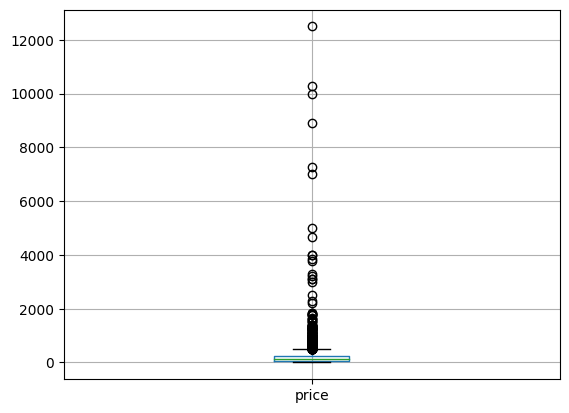

In [8]:
# Check for the outlier for listing price using boxplot
listings.boxplot(column='price')
plt.show()

In [9]:
q1 = listings['price'].quantile(0.25)
q3 = listings['price'].quantile(0.75)
upper_limit = q3 + 1.5 * (q3-q1)
lower_limit = q3 - 1.5 * (q3-q1)

In [10]:
# Filtering outliers
listings_cleaned = listings[listings['price'] > lower_limit]
listings_cleaned = listings[listings['price'] < upper_limit]

listings_cleaned['price'].describe()

count    3839.000000
mean      144.593644
std       110.778563
min         0.000000
25%        59.000000
50%       103.000000
75%       200.000000
max       495.000000
Name: price, dtype: float64

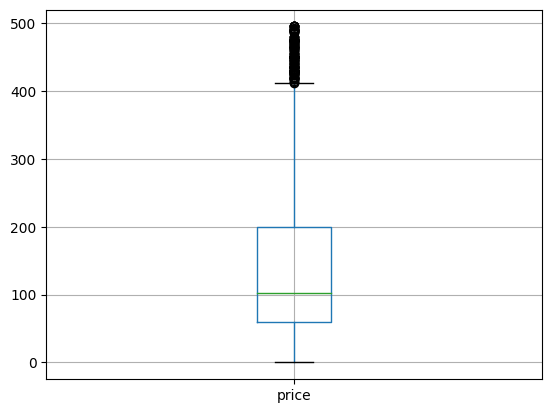

In [11]:
# Boxplot (after cleaned)
listings_cleaned.boxplot(column='price')
plt.show()

In [12]:
listings_cleaned.drop('Unnamed: 0', inplace = True, axis=1)

/var/folders/fy/mr_jgyy15_1531cty9sz3r040000gn/T/ipykernel_13321/4155658883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_cleaned.drop('Unnamed: 0', inplace = True, axis=1)


In [13]:
neighbourhood.head()

,Unnamed: 0,neighbourhood_group,neighbourhood
0,0,Central Region,Bishan
1,1,Central Region,Bukit Merah
2,2,Central Region,Bukit Timah
3,3,Central Region,Downtown Core
4,4,Central Region,Geylang


In [14]:
neighbourhood.rename(columns = {'neighbourhood_group':'region'}, inplace = True)

In [15]:
neighbourhood.drop('Unnamed: 0', inplace = True, axis=1)

In [16]:
reviews.head()

,Unnamed: 0,listing_id,date
0,28,71609,2018-07-14
1,29,71609,2019-01-06
2,30,71609,2019-07-27
3,31,71609,2019-08-11
4,32,71609,2019-09-07


In [17]:
reviews.rename(columns = {'listing_id':'id'}, inplace = True)

In [18]:
reviews.drop('Unnamed: 0', inplace = True, axis=1)

In [19]:
# Add year & month column
reviews['yearmonth'] = reviews['date'].str.slice(0,7)
reviews.head()

,id,date,yearmonth
0,71609,2018-07-14,2018-07
1,71609,2019-01-06,2019-01
2,71609,2019-07-27,2019-07
3,71609,2019-08-11,2019-08
4,71609,2019-09-07,2019-09


In [20]:
# Merge listings and reviews
df1 = listings_cleaned.merge(reviews, on='id')
df1.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,date,yearmonth
0,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2018-07-14,2018-07
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-01-06,2019-01
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-07-27,2019-07
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-08-11,2019-08
4,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-09-07,2019-09


In [21]:
# Merge df1 and neighbourhood
df = df1.merge(neighbourhood, on='neighbourhood')
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,date,yearmonth,region
0,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,2018-07-14,2018-07,East Region
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,2019-01-06,2019-01,East Region
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,2019-07-27,2019-07,East Region
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,2019-08-11,2019-08,East Region
4,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,2019-09-07,2019-09,East Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48420,671420672804206685,Sentosa Michael Hotel Singapore 1 King bed,453867121,Bill,Southern Islands,1.256984,103.820268,Private room,342,1,179,2022-09-08,2022-09,Central Region
48421,689454169226814047,Sentosa hard rock hotel Singapore beach island,467355165,Deng,Southern Islands,1.257538,103.821415,Private room,333,1,352,2022-08-14,2022-08,Central Region
48422,689454169226814047,Sentosa hard rock hotel Singapore beach island,467355165,Deng,Southern Islands,1.257538,103.821415,Private room,333,1,352,2022-09-05,2022-09,Central Region
48423,540170321699689740,PasirPutih Travel Homestay(10pax)MYPGU-PasirGu...,318843294,Adam,North-Eastern Islands,1.439270,103.932050,Entire home/apt,47,2,181,2022-05-16,2022-05,North-East Region


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48425 entries, 0 to 48424
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                48425 non-null  int64  
 1   name              48425 non-null  object 
 2   host_id           48425 non-null  int64  
 3   host_name         48425 non-null  object 
 4   neighbourhood     48425 non-null  object 
 5   latitude          48425 non-null  float64
 6   longitude         48425 non-null  float64
 7   room_type         48425 non-null  object 
 8   price             48425 non-null  int64  
 9   minimum_nights    48425 non-null  int64  
 10  availability_365  48425 non-null  int64  
 11  date              48425 non-null  object 
 12  yearmonth         48425 non-null  object 
 13  region            48425 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 5.5+ MB


In [23]:
# Change 'date' type
df['date'] = pd.to_datetime(df.date)

In [24]:
# Drop duplicate data
df = df.drop_duplicates()
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,date,yearmonth,region
0,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,2018-07-14,2018-07,East Region
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,2019-01-06,2019-01,East Region
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,2019-07-27,2019-07,East Region
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,2019-08-11,2019-08,East Region
4,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.345370,103.958870,Private room,145,92,340,2019-09-07,2019-09,East Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48420,671420672804206685,Sentosa Michael Hotel Singapore 1 King bed,453867121,Bill,Southern Islands,1.256984,103.820268,Private room,342,1,179,2022-09-08,2022-09,Central Region
48421,689454169226814047,Sentosa hard rock hotel Singapore beach island,467355165,Deng,Southern Islands,1.257538,103.821415,Private room,333,1,352,2022-08-14,2022-08,Central Region
48422,689454169226814047,Sentosa hard rock hotel Singapore beach island,467355165,Deng,Southern Islands,1.257538,103.821415,Private room,333,1,352,2022-09-05,2022-09,Central Region
48423,540170321699689740,PasirPutih Travel Homestay(10pax)MYPGU-PasirGu...,318843294,Adam,North-Eastern Islands,1.439270,103.932050,Entire home/apt,47,2,181,2022-05-16,2022-05,North-East Region


# Business Questions

1. How’s the rental trend?
2. In what month and year were the fewest and most numerous listing rental activities?
3. How's the price distribution?
4. Which type of room is most in demand?
5. How's the rental trend in region? What and why?
6. How is the rental activity from the top 100 listings? 

# Rental Trend

In [25]:
trend = df.groupby('yearmonth')['yearmonth'].count()
trend

yearmonth
2018-01     438
2018-02     413
2018-03     485
2018-04     508
2018-05     532
2018-06     577
2018-07     677
2018-08     677
2018-09     691
2018-10     649
2018-11     660
2018-12     914
2019-01     870
2019-02     851
2019-03     965
2019-04     902
2019-05     933
2019-06    1099
2019-07    1185
2019-08    1325
2019-09    1316
2019-10    1216
2019-11    1304
2019-12    1783
2020-01    1620
2020-02    1022
2020-03     790
2020-04     171
2020-05     285
2020-06     357
2020-07     538
2020-08     521
2020-09     506
2020-10     472
2020-11     387
2020-12     633
2021-01     411
2021-02     379
2021-03     539
2021-04     505
2021-05     467
2021-06     356
2021-07     364
2021-08     385
2021-09     470
2021-10     693
2021-11     782
2021-12    1127
2022-01     861
2022-02     822
2022-03     800
2022-04    1031
2022-05    1841
2022-06    1907
2022-07    2129
2022-08    2193
2022-09    1417
Name: yearmonth, dtype: int64

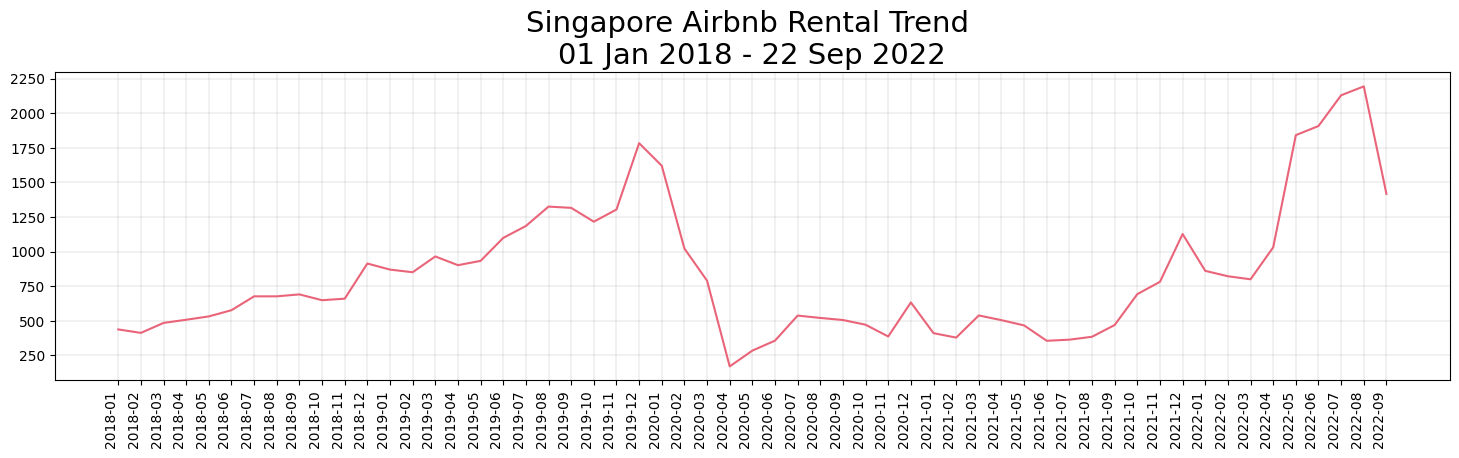

In [26]:
fig, ax = plt.subplots(figsize=(18, 4))
plt.plot(trend, color='#E96479')
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=90, horizontalalignment="right")
plt.title('Singapore Airbnb Rental Trend \n01 Jan 2018 - 22 Sep 2022', fontsize=21)
plt.grid(linewidth=0.25)
plt.show()

# The Fewest and The Most Active Rental Activities

In [27]:
rental = df[['date']].copy()
rental

,date
0,2018-07-14
1,2019-01-06
2,2019-07-27
3,2019-08-11
4,2019-09-07
...,...
48420,2022-09-08
48421,2022-08-14
48422,2022-09-05
48423,2022-05-16


In [28]:
rental = rental.groupby(['date'])['date'].size().reset_index(name='counts')
rental

,date,counts
0,2018-01-01,40
1,2018-01-02,25
2,2018-01-03,20
3,2018-01-04,8
4,2018-01-05,13
...,...,...
1721,2022-09-18,110
1722,2022-09-19,40
1723,2022-09-20,18
1724,2022-09-21,23


In [29]:
rental[rental.counts == rental.counts.max()]

,date,counts
1693,2022-08-21,150


In [30]:
rental[rental.counts == rental.counts.min()]

,date,counts
843,2020-04-23,1


# Price Distribution

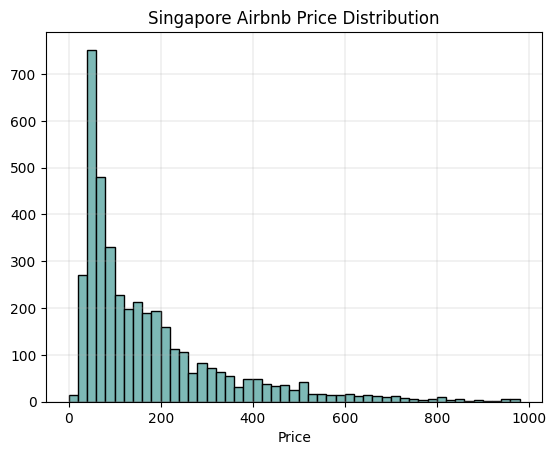

In [31]:
plt.hist(listings['price'], bins=np.arange(0,1000,20), color='#7DB9B6', edgecolor='black')
plt.xlabel('Price')
plt.title('Singapore Airbnb Price Distribution')
plt.grid(linewidth=0.25)
plt.show()

In [32]:
listings.price.describe()

count     4161.000000
mean       214.505167
std        454.921421
min          0.000000
25%         60.000000
50%        120.000000
75%        235.000000
max      12494.000000
Name: price, dtype: float64

# Rental Activities in Neighbourhood Region

In [33]:
reg_act = df[['region', 'date']].copy()
reg_act.sort_values('date')

,region,date
77,East Region,2018-01-01
7902,Central Region,2018-01-01
7806,Central Region,2018-01-01
13004,Central Region,2018-01-01
40920,West Region,2018-01-01
...,...,...
23926,North Region,2022-09-22
3368,Central Region,2022-09-22
7369,Central Region,2022-09-22
7716,Central Region,2022-09-22


In [34]:
reg_act['region'].unique()

array(['East Region', 'Central Region', 'North-East Region',
       'North Region', 'West Region'], dtype=object)

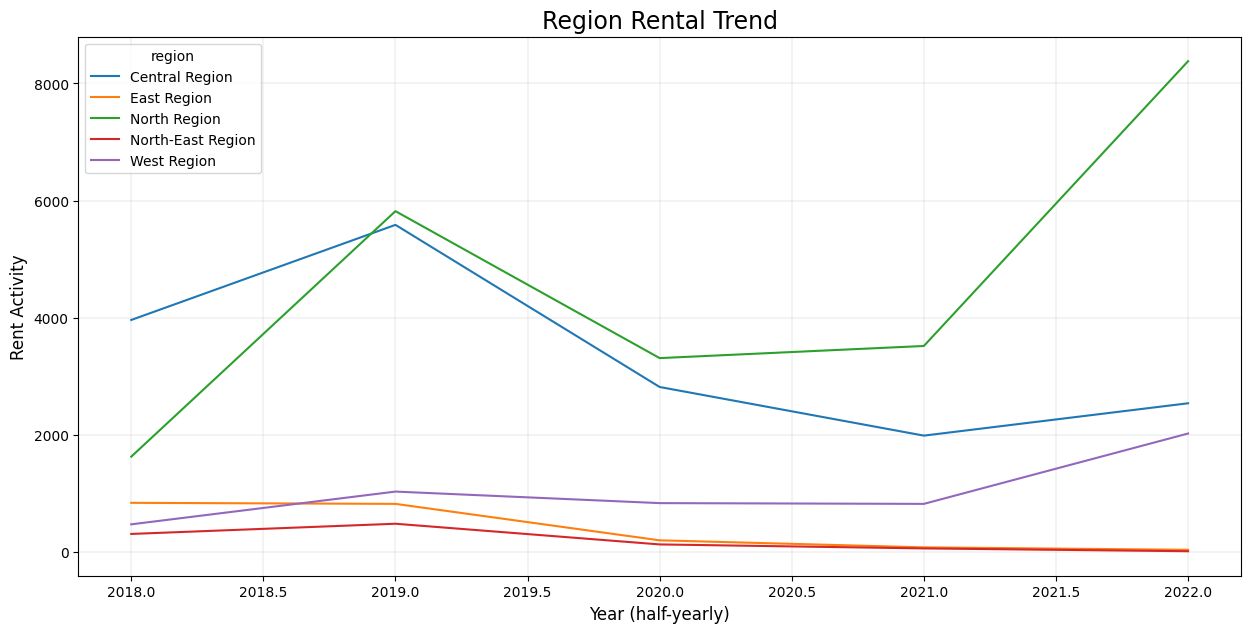

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
reg_act.groupby([reg_act.date.dt.year, reg_act.region]).count()['date'].unstack().plot(ax=ax)
plt.title('Region Rental Trend', fontsize=17)
plt.xlabel('Year (half-yearly)', fontsize=12)
plt.ylabel('Rent Activity', fontsize=12)
plt.grid(linewidth=0.20)
plt.show()

In [36]:
reg_act1 = reg_act.groupby([reg_act.region, reg_act.date.dt.year])['date'].count().reset_index(name='counts')
reg_act1

,region,date,counts
0,Central Region,2018,3963
1,Central Region,2019,5586
2,Central Region,2020,2819
3,Central Region,2021,1989
4,Central Region,2022,2541
5,East Region,2018,842
6,East Region,2019,824
7,East Region,2020,202
8,East Region,2021,82
9,East Region,2022,40


# Price Trend in Neighbourhood Region

In [37]:
reg_price = listings_cleaned[['neighbourhood', 'price']].copy()
reg_price = reg_price.drop_duplicates()
reg_price

,neighbourhood,price
0,Bukit Timah,80
1,Tampines,145
2,Tampines,85
4,Bukit Merah,49
5,Tampines,184
...,...,...
4154,Tanglin,87
4156,Marine Parade,263
4157,Newton,354
4158,Newton,398


In [38]:
reg_price = reg_price.groupby(['neighbourhood']).mean()['price'].reset_index(name='price')
reg_price = neighbourhood.merge(reg_price, on='neighbourhood')
reg_price.sort_values('region')

,region,neighbourhood,price
0,Central Region,Bishan,135.000000
17,Central Region,Tanglin,239.852459
16,Central Region,Southern Islands,370.454545
15,Central Region,Singapore River,216.274194
14,Central Region,Rochor,189.381818
13,Central Region,River Valley,228.133333
12,Central Region,Queenstown,223.229885
11,Central Region,Outram,232.324074
10,Central Region,Orchard,288.961538
9,Central Region,Novena,234.504950


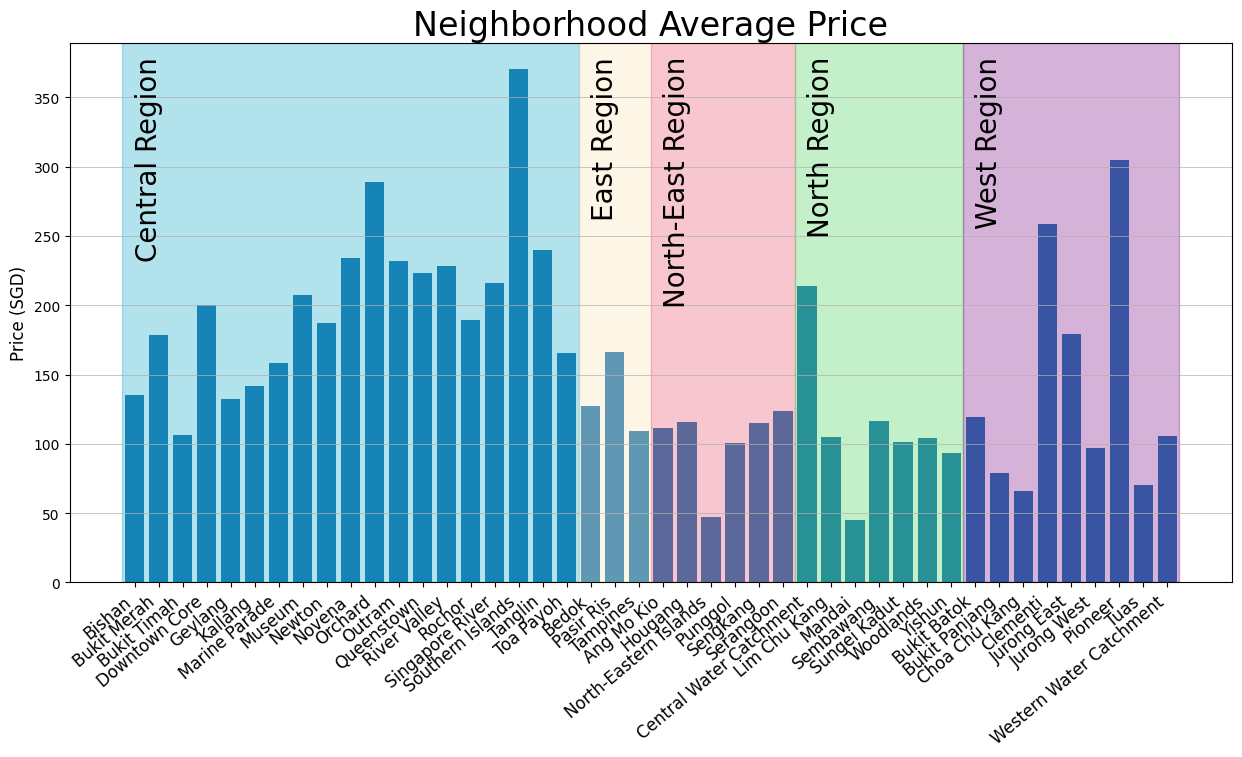

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(reg_price['neighbourhood'], reg_price['price'])
plt.setp(ax.get_xticklabels(), fontsize=12, rotation=40, horizontalalignment="right")

plt.title('Neighborhood Average Price', fontsize = 24)
plt.ylabel('Price (SGD)', fontsize = 12)

plt.axvspan(-0.5, 18.5, color='#009FBD', alpha=0.3)
plt.text(0, 380, "Central Region", va = 'top', rotation = 90, fontsize = 20)
plt.axvspan(18.5, 21.5, color='#F9E2AF', alpha=0.3)
plt.text(19, 380, "East Region", va = 'top', rotation = 90, fontsize = 20)
plt.axvspan(21.5, 27.5, color='#EB455F', alpha=0.3)
plt.text(22, 380, "North-East Region", va = 'top', rotation = 90, fontsize = 20)
plt.axvspan(27.5, 34.5, color='#3CCF4E', alpha=0.3)
plt.text(28, 380, "North Region", va = 'top', rotation = 90, fontsize = 20)
plt.axvspan(34.5, 43.5, color='#77037B', alpha=0.3)
plt.text(35, 380, "West Region", va = 'top', rotation = 90, fontsize = 20)
ax.grid(axis='y', linewidth=0.5)

plt.show()

In [40]:
reg_price1 = reg_price.groupby(['region']).mean()['price'].reset_index(name='price')
reg_price1 = reg_price1.sort_values('price', ascending=False)
reg_price1

/var/folders/fy/mr_jgyy15_1531cty9sz3r040000gn/T/ipykernel_13321/3872235328.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reg_price1 = reg_price.groupby(['region']).mean()['price'].reset_index(name='price')


,region,price
0,Central Region,201.962661
4,West Region,142.219974
1,East Region,134.376230
2,North Region,111.331861
3,North-East Region,102.287269


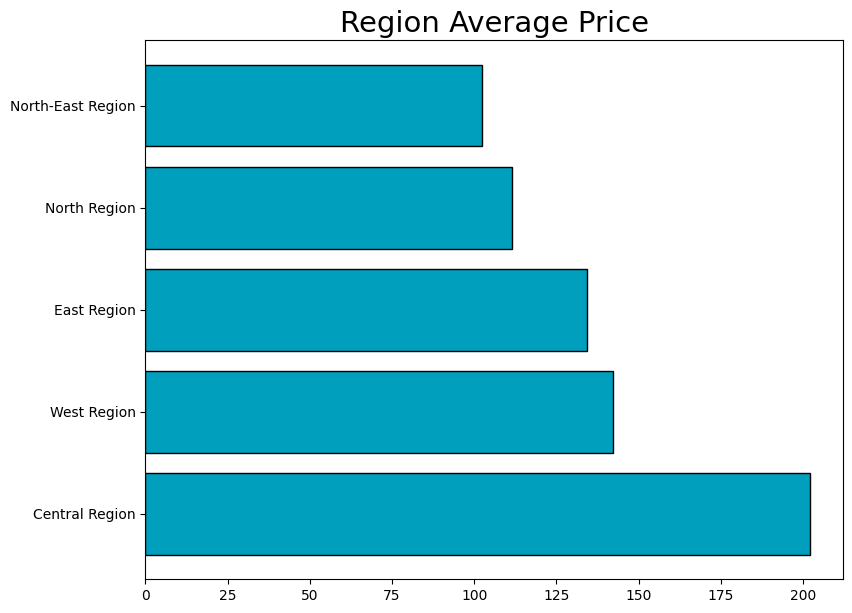

In [41]:
fig, ax = plt.subplots(figsize=(9,7))
plt.barh(reg_price1['region'], reg_price1['price'], color='#009FBD', edgecolor='black')
plt.title('Region Average Price', fontsize=21)
plt.show()

# Room Type 

In [42]:
room_type = df[['room_type']].copy()
room_type = room_type.groupby(['room_type']).size().reset_index(name='counts')
room_type.sort_values('counts')

,room_type,counts
3,Shared room,729
1,Hotel room,1926
2,Private room,12338
0,Entire home/apt,32758


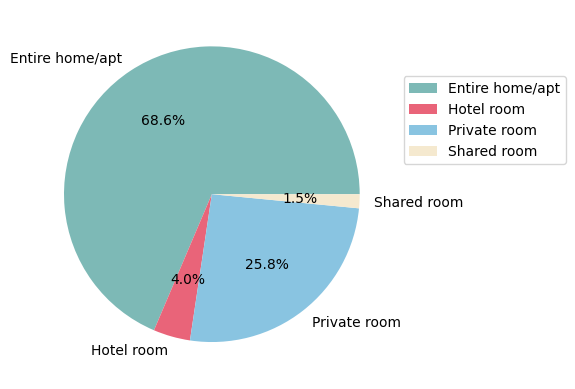

In [43]:
plt.pie(room_type['counts'], labels=room_type['room_type'], autopct='%1.1f%%',
       colors=['#7DB9B6', '#E96479', '#89C4E1', '#F5E9CF'])
plt.legend(room_type['room_type'], loc='center left', bbox_to_anchor=(1,0.7))
plt.show()

In [44]:
room_reg = listings_cleaned[['neighbourhood', 'room_type']].copy()
room_reg = room_reg.merge(neighbourhood, on='neighbourhood')
room_reg = room_reg.groupby(['region', 'room_type']).size().reset_index(name='counts')
room_reg

,region,room_type,counts
0,Central Region,Entire home/apt,1057
1,Central Region,Hotel room,127
2,Central Region,Private room,995
3,Central Region,Shared room,107
4,East Region,Entire home/apt,31
5,East Region,Private room,129
6,East Region,Shared room,3
7,North Region,Entire home/apt,644
8,North Region,Hotel room,11
9,North Region,Private room,143


In [45]:
pivot = pd.pivot_table(data=room_reg, index=['region'], columns=['room_type'], values='counts')
pivot = pivot.sort_values('Entire home/apt', ascending=False)
pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room
region,,,,
Central Region,1057.0,127.0,995.0,107.0
North Region,644.0,11.0,143.0,4.0
West Region,376.0,NaN,121.0,1.0
East Region,31.0,NaN,129.0,3.0
North-East Region,16.0,NaN,71.0,3.0


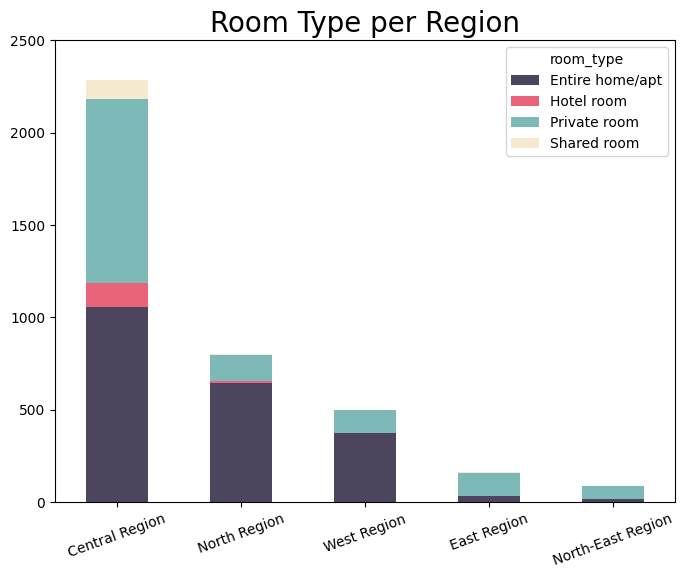

In [46]:
ax = pivot.plot.bar(stacked=True, color =['#4D455D', '#E96479', '#7DB9B6', '#F5E9CF'], figsize=(8,6))
ax.set_title('Room Type per Region', fontsize=20)
ax.set_ylim(0,2500)
ax.set_xticklabels(['Central Region', 'North Region', 'West Region', 'East Region', 'North-East Region'], 
                   rotation=20)
plt.xlabel('')
plt.show()

# Top 100 Listings

In [47]:
top_list = df[['id', 'region', 'room_type']].copy()
top_list = top_list.groupby(['id', 'region', 'room_type'])['id'].count().reset_index(name='count')
top_list = top_list.sort_values('count', ascending=False)
top_list = top_list.head(100)
top_list

,id,region,room_type,count
649,25360027,North Region,Entire home/apt,413
702,27292304,North Region,Entire home/apt,352
629,24834130,North Region,Entire home/apt,334
687,26672993,North Region,Entire home/apt,291
706,27419905,North Region,Entire home/apt,287
...,...,...,...,...
124,8180346,East Region,Private room,104
82,5919270,East Region,Private room,103
364,17928170,Central Region,Entire home/apt,103
645,25282863,North-East Region,Private room,103


In [48]:
pivot2 = pd.pivot_table(data=top_list, index=['region'], columns=['room_type'], values='count', aggfunc='sum')
pivot2 = pivot2.sort_values(['Entire home/apt', 'Private room'], ascending=False)
pivot2

room_type,Entire home/apt,Hotel room,Private room
region,,,
North Region,10508.0,NaN,102.0
Central Region,2037.0,170.0,1869.0
West Region,303.0,NaN,NaN
East Region,272.0,NaN,740.0
North-East Region,245.0,NaN,103.0


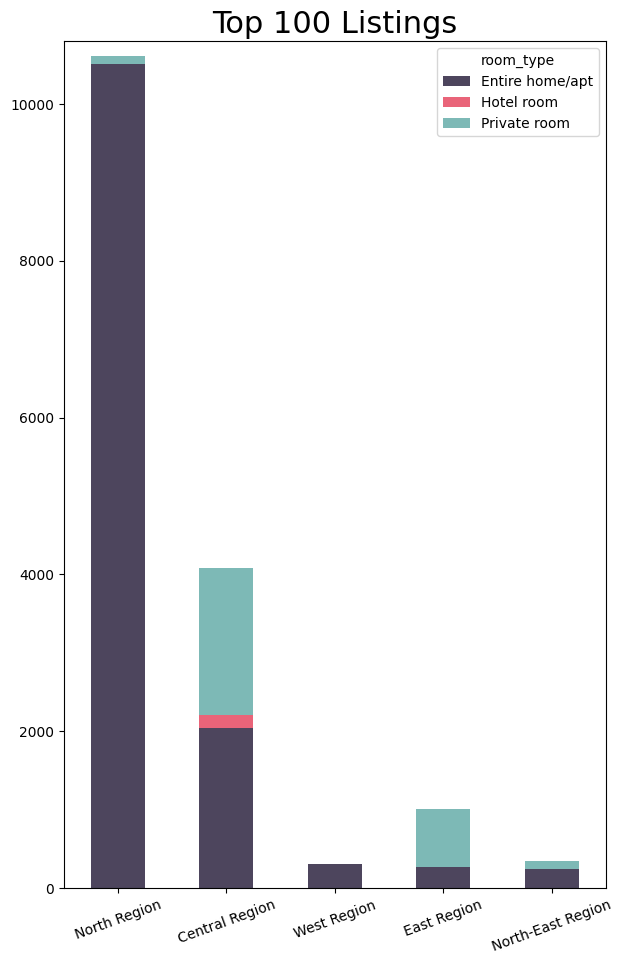

In [49]:
ax = pivot2.plot.bar(stacked=True, color =['#4D455D', '#E96479', '#7DB9B6', '#F5E9CF'], figsize=(7,11))
ax.set_title('Top 100 Listings', fontsize=22)
ax.set_ylim(0,10800)
ax.set_xticklabels(['North Region', 'Central Region', 'West Region', 'East Region', 'North-East Region'], 
                   rotation=20)
plt.xlabel('')
plt.show()

In [50]:
top_list2 = top_list.merge(df[['id', 'price']], on='id')
top_list2 = top_list2.drop_duplicates()
top_list2

,id,region,room_type,count,price
0,25360027,North Region,Entire home/apt,413,44
413,27292304,North Region,Entire home/apt,352,47
765,24834130,North Region,Entire home/apt,334,45
1099,26672993,North Region,Entire home/apt,291,43
1390,27419905,North Region,Entire home/apt,287,48
...,...,...,...,...,...
15834,8180346,East Region,Private room,104,45
15938,5919270,East Region,Private room,103,80
16041,17928170,Central Region,Entire home/apt,103,222
16144,25282863,North-East Region,Private room,103,80


In [51]:
top_list2['price'].describe()

count    100.000000
mean      90.600000
std       77.376947
min       28.000000
25%       45.000000
50%       60.000000
75%       90.500000
max      444.000000
Name: price, dtype: float64

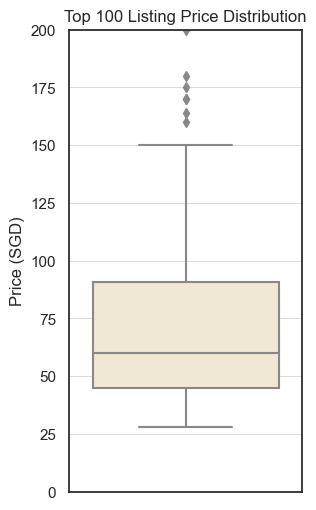

In [52]:
sns.set(rc={"figure.figsize":(3, 6)})
sns.set_style("white")
sns.boxplot(data = top_list2, y='price', showfliers = True, color='#F5E9CF')
plt.title('Top 100 Listing Price Distribution')
plt.xlabel('')
plt.ylabel('Price (SGD)')
plt.ylim(0,200)
plt.grid(linewidth=0.5, axis='y')
plt.show()